In [314]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data  
from datetime import datetime
from tqdm.notebook import tqdm
import math

In [25]:
open_df = pd.read_csv("ochlv_csv/코스피/Open.csv",index_col=0)
open_df = open_df.astype(float)
open_df.index = pd.DatetimeIndex(open_df.index)

close_df = pd.read_csv("ochlv_csv/코스피/Close.csv",index_col=0)
close_df = close_df.astype(float)
close_df.index = pd.DatetimeIndex(close_df.index)

high_df = pd.read_csv("ochlv_csv/코스피/High.csv",index_col=0)
high_df = high_df.astype(float)
high_df.index = pd.DatetimeIndex(high_df.index)

low_df = pd.read_csv("ochlv_csv/코스피/Low.csv",index_col=0)
low_df = low_df.astype(float)
low_df.index = pd.DatetimeIndex(low_df.index)

volume_df = pd.read_csv("ochlv_csv/코스피/Volume.csv",index_col=0)
volume_df = volume_df.astype(float)
volume_df.index = pd.DatetimeIndex(volume_df.index)

In [110]:
start_date = close_df.index[0]
end_date = close_df.index[-1]

kospi_daily_rtn = df = data.get_data_yahoo("^KS11", start_date, end_date)["Close"].pct_change()

In [29]:
daily_return = close_df.pct_change()

# Open/Close Ratio With Highest Volume 모델

* Open/Close 비율이 1에 수렴 --> 일일 변동폭이 적음
* Volume 1분위 --> 거래량이 많았음
* OC 비율이 1분위고, Volume이 1분위면, 그만큼 Buy-Sell 쿠션 Effect가 Standing Out 했다는 의미
* 익일 가격 상승 기대

In [31]:
co_ratio_df = close_df/open_df

In [56]:
co_ratio_df = co_ratio_df.dropna(axis=1)

In [58]:
co_ratio_df

,동화약품,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,유한양행우,...,TRUE 인버스 유로선물 ETN B,TRUE 엔선물 ETN B,TRUE 레버리지 엔선물 ETN B,TRUE 인버스 엔선물 ETN B,TRUE 인버스 HSCEI ETN(H) B,TRUE 레버리지 HSCEI ETN(H),TRUE 인버스 2X HSCEI ETN(H),미래에셋 중국 심천 100 ETN,하나 코스피 변동성추세 추종 양매도 ETN,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2019-05-30,1.004320,0.988971,1.000000,0.990719,0.987871,1.000000,1.002494,0.981595,0.995918,1.009569,...,1.000000,1.0,1.000452,1.000000,1.003188,0.995978,1.001575,1.000961,0.999487,1.000000
2019-05-31,0.983957,0.992565,1.009615,1.035545,1.000000,0.971311,0.995025,0.987730,1.026971,1.007109,...,1.000000,1.0,1.000000,1.000000,0.993200,1.006549,0.990644,0.992399,1.000000,1.046358
2019-06-03,1.003261,0.964419,0.990476,1.013889,1.027816,1.010571,1.007426,0.996933,0.988142,0.995294,...,1.000000,1.0,0.988058,1.008542,0.994131,1.004067,0.989062,1.008604,1.000512,1.014768
2019-06-04,1.017354,1.019531,1.014423,1.022989,0.975676,1.001053,1.009828,0.996942,0.984127,0.988235,...,1.000000,1.0,0.997771,1.000000,1.008712,0.972250,1.026624,1.000000,1.000000,1.006198
2019-06-05,1.011727,1.001916,1.014218,0.995485,0.990331,1.019979,1.026379,1.021605,0.984064,0.992941,...,1.000000,1.0,1.000000,1.000000,1.001373,0.982544,1.030629,1.000000,1.000000,0.991837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.990937,0.961905,0.992537,1.015491,1.000000,0.995763,0.968835,0.988263,0.995153,0.990017,...,0.999478,1.0,1.002804,0.998511,1.002457,0.985094,1.010534,1.000000,1.000000,0.989721
2021-10-28,1.027273,1.014706,0.985019,0.981450,0.972093,0.990071,0.987413,0.990499,0.985413,0.996639,...,1.000000,1.0,1.001656,1.000000,1.000000,1.005302,1.009040,0.990129,1.000000,0.997024
2021-10-29,0.961765,1.000000,1.007576,0.955172,0.976303,0.984286,0.983051,1.002398,0.985197,0.986667,...,1.000000,1.0,1.003889,1.000000,1.000000,0.986193,0.995270,1.000000,1.000000,0.995529


In [131]:
daily_return

,동화약품,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,유한양행우,...,메리츠 인버스 은 선물 ETN(H),메리츠 레버리지 은 선물 ETN(H),메리츠 인버스 2X 은 선물 ETN(H),하나 KRX300 ETN,하나 KRX BBIG K-뉴딜 ETN,하나 레버리지 KRX BBIG K-뉴딜 ETN,하나 코스닥150 선물 ETN,하나 인버스 코스닥150 선물 ETN,하나 코스피 변동성추세 추종 양매도 ETN,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2019-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,-0.010753,-0.007435,0.000000,0.023419,-0.012278,-0.024691,-0.004975,0.006250,0.014344,0.007109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001026,0.053333
2019-06-03,0.003261,-0.035581,-0.009524,0.002288,0.020718,0.008439,0.017500,0.009317,0.010101,-0.004706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001538,0.014768
2019-06-04,0.016251,0.013592,0.014423,0.015982,-0.023004,-0.005230,0.009828,0.003077,-0.008000,-0.007092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.012474
2019-06-05,0.011727,0.001916,0.014218,-0.008989,-0.006925,0.019979,0.041363,0.015337,-0.004032,0.004762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000512,-0.002053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.000000,-0.028846,-0.003745,0.013746,0.004651,-0.002829,-0.031165,-0.011737,-0.006452,0.008475,...,0.016451,-0.039139,0.037911,0.008118,0.012793,-0.021186,0.017500,-0.014743,0.001921,-0.010279
2021-10-28,0.033537,0.024752,-0.011278,-0.013559,-0.032407,-0.009929,-0.012587,-0.009501,-0.012987,-0.003361,...,-0.003433,0.012948,-0.003870,-0.005685,-0.008421,-0.019171,-0.011302,0.005676,0.001278,-0.005935
2021-10-29,-0.035398,0.000000,0.011407,-0.048110,-0.014354,-0.012894,-0.014164,0.002398,-0.014803,-0.001686,...,0.008858,-0.019174,-0.001943,-0.018104,-0.023885,-0.032156,0.001988,0.007696,0.000000,-0.002985


In [339]:
q8 = ["q1","q2","q3","q4","q5","q6","q7","q8"]
qcut_df = co_ratio_df.apply(lambda x : pd.qcut(x,8,q8), axis=1)
volume_qcut = volume_df.apply(lambda x : pd.qcut(x,8,q8), axis=1)

In [344]:
i

Timestamp('2021-11-02 00:00:00')

In [351]:
set(volume_qcut.loc[i][volume_qcut.loc[i] == "q1"].index).intersection(set(qcut_df.loc[i][qcut_df.loc[i] == "q1"].index))

{'KBSTAR 차이나H선물인버스(H)',
 'SK네트웍스우',
 'TRUE 인버스 HSCEI ETN(H) B',
 '미래에셋 Q150 Core5 ETN',
 '미래에셋 인버스 전기전자 Core5 ETN',
 '삼성 레버리지 China A50 선물 ETN(H)',
 '신한 USD K200 선물 바이셀 ETN',
 '흥국화재2우B'}

In [366]:
portfolio_df

,return
date,
2019-05-30,0.015695
2019-05-31,-0.003059
2019-06-03,0.006306
2019-06-04,0.008269
2019-06-05,0.000000
...,...
2021-10-27,0.000000
2021-10-28,0.000000
2021-10-29,0.001522


In [365]:
portfolio_df = pd.DataFrame(portfolio_df.mean(axis=1).fillna(0), columns=["return"])

In [359]:
portfolio_df = pd.DataFrame(index = qcut_df.index, columns=qcut_df.columns)
for i in tqdm(qcut_df.index):
    tics = list(set(volume_qcut.loc[i][volume_qcut.loc[i] == "q1"].index).intersection(set(qcut_df.loc[i][qcut_df.loc[i] == "q1"].index)))
    if len(tics) > 0:
        portfolio_df.loc[i, tics] = daily_return.shift(-1).loc[i, tics]

portfolio_df = pd.DataFrame(portfolio_df.mean(axis=1).fillna(0), columns=["return"])

  0%|          | 0/600 [00:00<?, ?it/s]

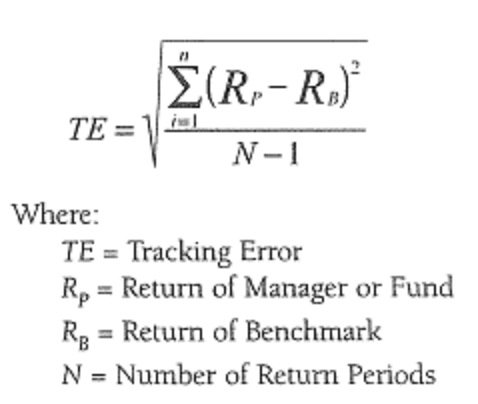

## IR = 초과수익률 / TE

In [283]:
def tracking_error(rp,rb):
    add_return_sqr = 0
    for i in rp.index:
        add_return_sqr += (rp.loc[i]["return"] - rb.loc[i])** 2
    te = (add_return_sqr/(len(rp)-1))**0.5
    return te

def information_ratio(rp,rb,te):
    IR = (rp["return"].mean() - rb.dropna().mean())/te
    return IR


In [368]:
기초통계

,return
count,600.000000
mean,0.001715
std,0.017939
min,-0.092559
25%,-0.003347
50%,0.000000
75%,0.006753
max,0.298279


In [321]:
기초통계 = portfolio_df.describe()

te = tracking_error(portfolio_df.loc[kospi_daily_rtn.dropna().index], kospi_daily_rtn)

IR = information_ratio(portfolio_df.loc[kospi_daily_rtn.dropna().index], kospi_daily_rtn, te)

상관관계 = pd.concat([portfolio_df, kospi_daily_rtn.shift(-1)], axis=1).corr()
상관관계.columns = ["Portfolio", "Kospi"]
상관관계.index = ["Portfolio", "Kospi"]
상관관계

sharp = (기초통계.loc["mean", "return"]) / 기초통계.loc["std", "return"] * math.sqrt(252)
    
summary_table = pd.Series(index=["Corr (Bench.M)", "IR", "MDD", "Sharp.R", "Mean"])
summary_table.loc["Corr (Bench.M)"] = 상관관계.loc["Portfolio", "Kospi"]
summary_table.loc["IR"] = IR
summary_table.loc["MDD"] = 기초통계.loc["min", "return"]
summary_table.loc["Mean"] = 기초통계.loc["mean", "return"]
summary_table.loc["Sharp.R"] = sharp



<ipython-input-321-b5853a1831c3>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  summary_table = pd.Series(index=["Corr (Bench.M)", "IR", "MDD", "Sharp.R", "Mean"])


In [367]:
기초통계

,return
count,600.000000
mean,0.001715
std,0.017939
min,-0.092559
25%,-0.003347
50%,0.000000
75%,0.006753
max,0.298279


<ipython-input-326-273106ddca0c>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  summary_table = pd.Series(index=["Corr (Bench.M)", "IR", "MDD", "Sharp.R", "Mean"])


Corr (Bench.M)    0.219857
IR                0.040751
MDD              -0.092559
Sharp.R           1.517695
Mean              0.001715
dtype: float64


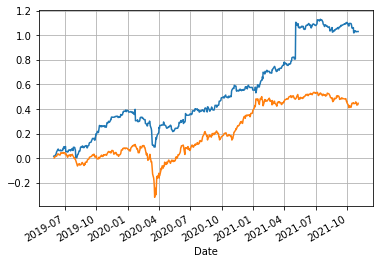

In [326]:
기초통계 = portfolio_df.describe()

te = tracking_error(portfolio_df.loc[kospi_daily_rtn.dropna().index], kospi_daily_rtn)

IR = information_ratio(portfolio_df.loc[kospi_daily_rtn.dropna().index], kospi_daily_rtn, te)

상관관계 = pd.concat([portfolio_df, kospi_daily_rtn.shift(-1)], axis=1).corr()
상관관계.columns = ["Portfolio", "Kospi"]
상관관계.index = ["Portfolio", "Kospi"]

sharp = (기초통계.loc["mean", "return"]) / 기초통계.loc["std", "return"] * math.sqrt(252)
    
summary_table = pd.Series(index=["Corr (Bench.M)", "IR", "MDD", "Sharp.R", "Mean"])
summary_table.loc["Corr (Bench.M)"] = 상관관계.loc["Portfolio", "Kospi"]
summary_table.loc["IR"] = IR
summary_table.loc["MDD"] = 기초통계.loc["min", "return"]
summary_table.loc["Mean"] = 기초통계.loc["mean", "return"]
summary_table.loc["Sharp.R"] = sharp

print(summary_table)

portfolio_df.mean(axis=1).fillna(0).cumsum().plot()
kospi_daily_rtn.cumsum().plot()
plt.grid()



In [370]:
close_df.head(10)

,동화약품,KR모터스,경방,메리츠화재,삼양홀딩스,삼양홀딩스우,하이트진로,하이트진로2우B,유한양행,유한양행우,...,메리츠 인버스 은 선물 ETN(H),메리츠 레버리지 은 선물 ETN(H),메리츠 인버스 2X 은 선물 ETN(H),하나 KRX300 ETN,하나 KRX BBIG K-뉴딜 ETN,하나 레버리지 KRX BBIG K-뉴딜 ETN,하나 코스닥150 선물 ETN,하나 인버스 코스닥150 선물 ETN,하나 코스피 변동성추세 추종 양매도 ETN,엘브이엠씨홀딩스
date,,,,,,,,,,,,,,,,,,,,,
2019-05-30,9300.0,538.0,10500.0,21350.0,73300.0,48600.0,20100.0,16000.0,244000.0,211000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9745.0,2250.0
2019-05-31,9200.0,534.0,10500.0,21850.0,72400.0,47400.0,20000.0,16100.0,247500.0,212500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9755.0,2370.0
2019-06-03,9230.0,515.0,10400.0,21900.0,73900.0,47800.0,20350.0,16250.0,250000.0,211500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9770.0,2405.0
2019-06-04,9380.0,522.0,10550.0,22250.0,72200.0,47550.0,20550.0,16300.0,248000.0,210000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9770.0,2435.0
2019-06-05,9490.0,523.0,10700.0,22050.0,71700.0,48500.0,21400.0,16550.0,247000.0,211000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9775.0,2430.0
2019-06-07,9220.0,519.0,10500.0,21000.0,71800.0,48700.0,21400.0,16650.0,247500.0,212500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9785.0,2460.0
2019-06-10,9220.0,513.0,10700.0,21350.0,72200.0,48200.0,21500.0,16600.0,250500.0,212500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9780.0,2490.0
2019-06-11,9520.0,525.0,10800.0,21950.0,73600.0,48550.0,21600.0,16600.0,248500.0,212500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9780.0,2485.0
2019-06-12,9600.0,525.0,10600.0,21750.0,73400.0,49000.0,21500.0,16600.0,249500.0,212500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9785.0,2485.0


<AxesSubplot:xlabel='date'>

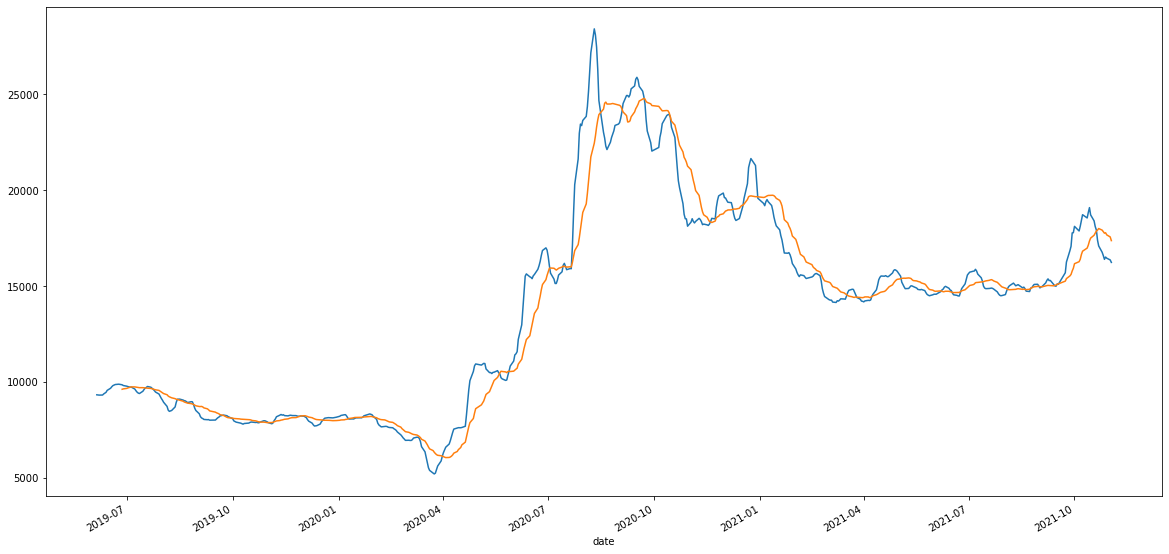

In [372]:
close_df.rolling(5).mean()["동화약품"].plot(figsize=(20,10))
close_df.rolling(20).mean()["동화약품"].plot(figsize=(20,10))